In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "sim.out"
data_raw = np.genfromtxt(fname,delimiter=",")

In [3]:
with open(fname, 'r') as file:
    first_line = file.readline()
keys = [item.strip() for item in first_line.lstrip('#').strip().split(',')][2:] # skip first two (planet id and time id)

In [4]:
data = {}
n_p_max = int(np.amax(data_raw[:,0])) # assume column 0 is planet id
n_t_max = int(np.amax(data_raw[:,1])) # assume column 1 is time id
for k in keys:
    data[k] = np.zeros((n_t_max,n_p_max))
for d in data_raw:
    for ik,k in enumerate(keys):
        data[k][int(d[1])-1,int(d[0])-1] = d[ik+2]
for k in keys:
    if k!='t':
        data[k][data['t']==0] = np.nan
data['np'] = np.sum(data['t']!=0, axis=1)
data['t'] = np.amax(data['t'], axis=1)

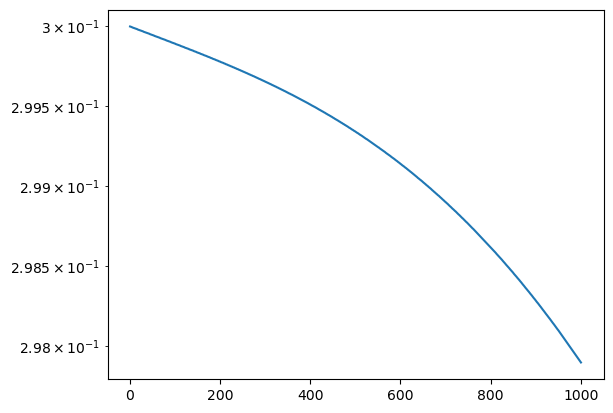

In [5]:
for i in range(n_p_max):
    plt.plot(data['t'], data['a'][:,i])
plt.yscale('log')

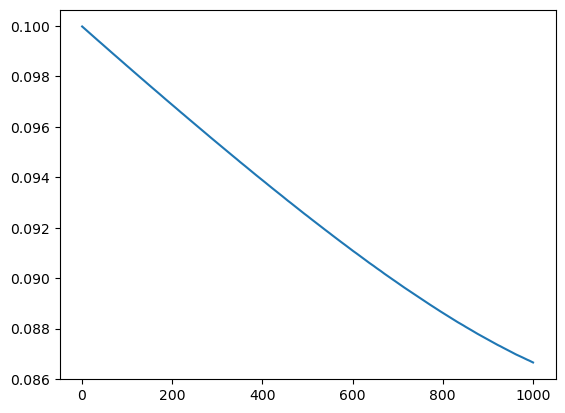

In [6]:
for i in range(n_p_max):
    plt.plot(data['t'], data['e'][:,i])